In [1]:
import numpy as np
import PIL
import torch
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

from loaders import LIDC_IDRI
import matplotlib.pyplot as plt
import glob


In [2]:
path = '/home/syl/Documents/Project/prob_reg/download/images/test_LIDC_07_18_2020_14_27/'
save_path = '/home/syl/Documents/Project/prob_reg/images/Toshow/LIDC/'
dataset = LIDC_IDRI('/home/syl/Documents/Project/prob_reg/dataset/hpu-lung', 'test')
dataset.idx2 = 0
test_files = glob.glob(path+"*prob.npy")
os.makedirs(save_path, exist_ok=True)

=> Testing Dataset contains 1980 images


In [3]:

sample_num = 8
    
font = ImageFont.truetype("/home/syl/Documents/Doc/open-sans/OpenSans-Bold.ttf", 20)

for ii, file in enumerate(test_files):
    img_key = os.path.basename(file).replace("_16prob.npy", "")
    samples = np.load(file.replace("prob.npy", "sample_labelIds.npy"))
    # print(samples.shape)
    probs = np.load(file)

    # plt.imshow(datadict['img'][0,...])
    # plt.show()
    # gt_modes = np.concatenate([np.pad(datadict['gt_modes'][i,...], ((2,2),(2,2)), constant_values=1) for i in range(4)], axis=1)
    # data_arr = np.concatenate([np.pad(datadict['img'][0,...], ((2,2),(2,2)), constant_values=1), gt_modes], axis= 1)
    gt_modes_dict = dataset.get_gt_modes(img_key)
    
    gt_modes = []
    for j in range(4):
        tmp = gt_modes_dict['gt_modes'][j,...] * 255.
        tmp = Image.fromarray(tmp) 
        draw = ImageDraw.Draw(tmp)
        draw.text((0, 0),"Grader {}".format(j),255,font=font)
        tmp = np.array(tmp)/255.
        tmp = np.pad(np.array(tmp), ((2,2),(2,2)), constant_values=1)
        gt_modes.append(tmp)



    data_arr = np.concatenate([np.pad(gt_modes_dict['img'][0,...], ((2,2),(2,2)), constant_values=1), *gt_modes], axis= 1)

    sample_arr_row1 = []
    sample_arr_row2 = []

    white = np.ones([184, 184])
    sample_arr_row1.append(white)
    sample_arr_row2.append(white)

    for i in range(0, sample_num//2):
        
        sample = samples[i, 0,...]*255.
        sample = Image.fromarray(sample)
        prob = probs[i]
    #     print(prob)
        draw = ImageDraw.Draw(sample)
    #     # font = ImageFont.truetype(<font-file>, <font-size>)
    #     font = ImageFont.truetype("sans-serif.ttf", 16)
    #     # draw.text((x, y),"Sample Text",(r,g,b))
        draw.text((0, 0),"{:.4f}".format(prob),255,font=font)
        sample = np.array(sample)/255.
        sample = np.pad(np.array(sample), ((2,2),(2,2)), constant_values=1)
        sample_arr_row1.append(sample)


    for i in range(sample_num//2, sample_num):
        sample = samples[i, 0,...]*255.
        sample = Image.fromarray(sample)
        prob = probs[i]
    #     print(prob)
        draw = ImageDraw.Draw(sample)
    #     # font = ImageFont.truetype(<font-file>, <font-size>)
    #     font = ImageFont.truetype("sans-serif.ttf", 16)
    #     # draw.text((x, y),"Sample Text",(r,g,b))
        draw.text((0, 0),"{:.4f}".format(prob),255,font=font)
        sample = np.array(sample)/255.
        sample = np.pad(np.array(sample), ((2,2),(2,2)), constant_values=1)
        sample_arr_row2.append(sample)

    sample_arr_row1 = np.concatenate(sample_arr_row1, axis=1)
    sample_arr_row2 = np.concatenate(sample_arr_row2, axis=1)

#     print(sample_arr_row1.shape)
    final_image = np.concatenate([data_arr, sample_arr_row1, sample_arr_row2], axis=0)
#     fig = plt.figure(figsize = (10,10)) 
#     plt.imshow(final_image, cmap='gray')
#     plt.show()
    
    plt.imsave(save_path + '{}_{}sample.png'.format(img_key, sample_num), final_image, cmap='gray')

    if ii > 200:
        break




In [2]:
path = '/home/syl/Documents/Project/prob_reg/download/images/test_LIDC_07_18_2020_23_02/'
save_path = '/home/syl/Documents/Project/prob_reg/images/Toshow/LIDC/code_vis/'
dataset = LIDC_IDRI('/home/syl/Documents/Project/prob_reg/dataset/hpu-lung', 'test')
dataset.idx2 = 0
test_files = glob.glob(path+"*prob.npy")
os.makedirs(save_path, exist_ok=True)
font = ImageFont.truetype("/home/syl/Documents/Doc/open-sans/OpenSans-Bold.ttf", 20)

=> Testing Dataset contains 1980 images


In [14]:
#####################
# code visualization
#####################
sample_num = 5
np.random.seed(0)
# subset = np.random.choice(200, 0).astype(np.int)
subset = range(200)
print(subset)
used_idx = dict()

for i in subset:
    file = test_files[i]
    img_key = os.path.basename(file).replace("_16prob.npy", "")
    code_id = np.load(file.replace("prob.npy", "code_id.npy"))
    for item in code_id :
        used_idx[item] = used_idx.get(item, 0) + 1

frequent_idx = sorted(used_idx, key=used_idx.get)[-5:]
print(frequent_idx)
for key in sorted(used_idx, key=used_idx.get):
    print('{} : {}, '.format(key, used_idx[key]))

for i in subset:
    file = test_files[i]
    img_key = os.path.basename(file).replace("_16prob.npy", "")
    samples = np.load(file.replace("prob.npy", "sample_labelIds.npy"))
    probs = np.load(file)
    code_id = np.load(file.replace("prob.npy", "code_id.npy"))

    # plt.imshow(datadict['img'][0,...])
    # plt.show()
    # gt_modes = np.concatenate([np.pad(datadict['gt_modes'][i,...], ((2,2),(2,2)), constant_values=1) for i in range(4)], axis=1)
    # data_arr = np.concatenate([np.pad(datadict['img'][0,...], ((2,2),(2,2)), constant_values=1), gt_modes], axis= 1)
    gt_modes_dict = dataset.get_gt_modes(img_key)
    

    data_arr = [np.pad(gt_modes_dict['img'][0,...], ((2,2),(2,2)), constant_values=1)]

    for cand_code in frequent_idx:
        if cand_code in code_id:
            j = np.argmax(code_id == cand_code)
            sample = samples[j, 0, ...] * 255.
            sample = Image.fromarray(sample)
            prob = probs[j]
            if prob > 1e-4:
                draw = ImageDraw.Draw(sample)
                draw.text((0, 0),"{:.4f}".format(prob),255,font=font)
                sample = np.array(sample)/255.
                sample = np.pad(np.array(sample), ((2,2),(2,2)), constant_values=1)
                data_arr.append(sample)
            else:
                data_arr.append(np.ones([184, 184]))
            
        else:
            data_arr.append(np.ones([184, 184]))

    final_image = np.concatenate(data_arr, axis=1)
    plt.imsave(save_path + '{}_code_vis.png'.format(img_key), final_image, cmap='gray')
   


range(0, 200)
[320, 84, 102, 416, 288]
35 : 7, 
444 : 10, 
57 : 10, 
32 : 15, 
384 : 19, 
272 : 21, 
176 : 25, 
268 : 28, 
400 : 38, 
432 : 40, 
160 : 47, 
221 : 47, 
16 : 54, 
368 : 66, 
448 : 91, 
240 : 114, 
48 : 135, 
334 : 154, 
236 : 158, 
192 : 164, 
56 : 164, 
208 : 165, 
256 : 168, 
128 : 172, 
352 : 174, 
19 : 178, 
320 : 179, 
84 : 183, 
102 : 189, 
416 : 190, 
288 : 195, 


In [15]:
# combine
key_list = ['LIDC-IDRI-0063_z-138.0_c0_code_vis', 'LIDC-IDRI-0091_z-74.5_c0_code_vis', 'LIDC-IDRI-0049_z-181.25_c0_code_vis', 'LIDC-IDRI-0014_z-127.75_c0_code_vis', 'LIDC-IDRI-0007_z-37.0_c0_code_vis']
final_image = []
for key in key_list:
    final_image.append(np.array(Image.open(save_path + key + '.png'))[..., 0]/255.)

code_image = [np.ones([30, 184])]
for jj in frequent_idx:
    tmp = np.ones([30, 184])
    tmp = Image.fromarray(tmp)
    draw = ImageDraw.Draw(tmp)
    draw.text((0, 0),"code#{}".format(jj),0,font=font)
    tmp = np.array(tmp)
    code_image.append(tmp)

code_image = np.concatenate(code_image, axis=1)


final_image = np.concatenate([*final_image, code_image], axis=0)
plt.imsave(save_path + 'code_vis_combined.png', final_image, cmap='gray')

In [3]:
# compute generalized energy distance
def normalize(prob):
    norm = np.sum(np.array(prob))
    return np.array(prob) / norm
    
prob_array = []

for i, file in enumerate(test_files):
    img_key = os.path.basename(file).replace("_16prob.npy", "")
    prob_array.append(normalize(np.load(file))[None, ...])

prob_array = np.concatenate(prob_array, axis=0)
print(prob_array.shape)



(1980, 16)


In [4]:


import imp
import pickle
from model_evaluator import calc_energy_distances
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
cf = imp.load_source('cf', 'LIDC_eval_config.py')
results_file = os.path.join(cf.out_dir, 'eval_results.pkl')

with open(results_file, "rb") as f:
    results = pickle.load(f)

e_distances = []
e_means = []
samples_column = []
    

e_dist = calc_energy_distances(results['d_matrices'], source_probability_weighted=prob_array)
# print(e_dist)
e_dist = e_dist[~np.isnan(e_dist)]
e_distances.extend(e_dist)
samples_column.extend(['Ours'] * len(e_dist))
e_means.append(np.mean(e_dist))

energy = pd.DataFrame(data={'energy': e_distances, 'model': samples_column})
means = pd.DataFrame(data={'energy': e_means, 'models': ['Ours']})


=> Testing Dataset contains 1980 images


In [15]:

print(e_means)

print(np.array(e_distances).mean())
print(np.array(e_distances).std())

[0.3354409]
0.3354409
0.29471916


In [16]:
cf2 = imp.load_source('cf', 'LIDC_pu_eval_config.py')
results_file = os.path.join(cf2.out_dir, 'eval_results.pkl')

with open(results_file, "rb") as f:
    results = pickle.load(f)

e_distances2 = []
e_means2 = []
samples_column2 = []
    

e_dist = calc_energy_distances(results['d_matrices'])
e_dist = e_dist[~np.isnan(e_dist)]
e_distances2.extend(e_dist)
samples_column2.extend(['Probabilistic U-Net'] * len(e_dist))
e_means2.append(np.mean(e_dist))

print(e_means2)

print(np.array(e_distances2).mean())
print(np.array(e_distances2).std())

=> Testing Dataset contains 1980 images
[0.3470207]
0.3470207
0.31397557


In [8]:
final_distances = e_distances + e_distances2
final_exp = samples_column + samples_column2
final_means = e_means + e_means2

In [9]:
energy = pd.DataFrame(data={'energy': final_distances, 'model': final_exp})
means = pd.DataFrame(data={'energy': final_means, 'model': ['Ours', 'Probabilistic U-Net']})


Text(0.5, 0, 'model')

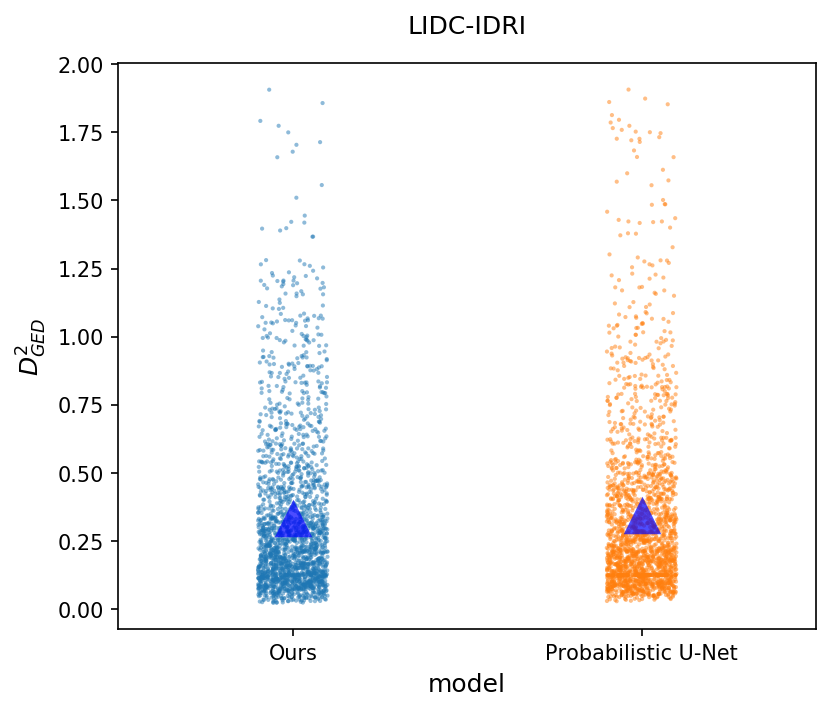

In [10]:
f, ax = plt.subplots(1,1,figsize=(6,5),dpi=150)

sns.stripplot(x="model", y="energy", data=energy, alpha=0.5, s=2, ax=ax)
sns.stripplot(x="model", y="energy", data=means, s=18, marker='^', alpha=0.7,color='b', ax=ax, jitter=False)
# sns.stripplot(x="num_samples", y="energy", data=energy2, alpha=0.5, s=2, ax=ax)
# sns.stripplot(x="num_samples", y="energy", data=means2, s=18, marker='^', alpha=0.7,color='b', ax=ax, jitter=False)
# sns.stripplot(x="num_samples", y="energy", data=means, s=14, marker='^', ax=ax, jitter=False)
ax.set_title('LIDC-IDRI', y=1.03)
fs=12
ax.set_ylabel(r'$D_{GED}^{2}$', fontsize=fs)
ax.set_xlabel('model', fontsize=fs)

In [11]:
os.makedirs(save_path, exist_ok=True)
f.savefig(save_path + 'prob_stat.png')